In [ ]:
pip install pgmpy

     |████████████████████████████████| 1.9 MB 26.9 MB/s 


In [16]:
# Importing necessary libraries
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Reading data
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Changing data into discrete variables before sending into the model

import numpy as np
bayes_data = data.copy()
bayes_data['ageC'] = np.where(data['age'] >=60,1,0)
bayes_data['oldpeakC'] = np.where(data['oldpeak'] <= 1 ,1 ,0)
bayes_data['thalachC'] = np.where(data['thalach'] >= 150 ,1 ,0)
bayes_data['trestbpsC'] = np.where(data['trestbps'] >= 120 ,1 ,0)

bayes_data.drop("age", axis =1 , inplace = True)
bayes_data.drop("trestbps", axis = 1, inplace = True)
bayes_data.drop("chol", axis = 1, inplace = True)
bayes_data.drop("oldpeak", axis = 1,inplace = True)
bayes_data.drop("thalach", axis = 1,inplace = True)
bayes_data.drop("fbs", axis = 1,inplace = True)
bayes_data.drop("restecg", axis = 1,inplace = True)


bayes_data.head(5)

,sex,cp,exang,slope,ca,thal,target,ageC,oldpeakC,thalachC,trestbpsC
0,1,3,0,0,0,1,1,1,0,1,1
1,1,2,0,0,0,2,1,0,0,1,1
2,0,1,0,2,0,2,1,0,0,1,1
3,1,1,0,2,0,2,1,0,1,1,1
4,0,0,1,2,0,2,1,0,1,1,1


In [23]:
# Creating Bayesian Model
model = BayesianModel([('ageC','trestbpsC'),('cp','exang'),('slope','oldpeakC'),('exang','thalachC'),
                       ('slope','thalachC'),('ca','ageC'),('thal','ca'),('thal','target'),('target','cp'),
                       ('sex','thal'),('target','oldpeakC'),('target','slope'),('trestbpsC','target')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [24]:
# Calculating accuracy for Bayesian Model
predictors = bayes_data.drop("target",axis=1)
target = bayes_data["target"]


X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
bayesian_train = X_train
bayesian_train['target'] = Y_train
train_data = bayesian_train
model.fit(train_data,estimator=MaximumLikelihoodEstimator)
test_data = X_test
#print(X_test)
y_pred = model.predict(test_data)


score_bn = accuracy_score(y_pred, Y_test)
score_bn *= 100
print("The accuracy score achieved using Bayesian Network model is: "+str(score_bn)+" %")


  0%|          | 0/56 [00:00<?, ?it/s]

The accuracy score achieved using Bayesian Network model is: 85.24590163934425 %


In [25]:
model.get_independencies()

(slope ⟂ exang | cp)
(slope ⟂ sex | thal)
(slope ⟂ thal, exang, cp, ageC, trestbpsC, sex, ca | target)
(slope ⟂ exang | cp, ageC)
(slope ⟂ exang | cp, trestbpsC)
(slope ⟂ exang, sex | cp, thal)
(slope ⟂ exang, thal, ageC, trestbpsC, sex, ca | cp, target)
(slope ⟂ exang | cp, oldpeakC)
(slope ⟂ exang | cp, sex)
(slope ⟂ exang | cp, ca)
(slope ⟂ sex, ca | thal, ageC)
(slope ⟂ exang, cp, thal, trestbpsC, sex, ca | ageC, target)
(slope ⟂ ageC, sex, ca | thal, trestbpsC)
(slope ⟂ thal, exang, cp, ageC, sex, ca | trestbpsC, target)
(slope ⟂ ageC | trestbpsC, ca)
(slope ⟂ sex | thal, thalachC)
(slope ⟂ thal, ageC, trestbpsC, sex, ca | thalachC, target)
(slope ⟂ exang, cp, ageC, trestbpsC, sex, ca | thal, target)
(slope ⟂ sex | thal, oldpeakC)
(slope ⟂ sex | thal, exang)
(slope ⟂ sex | thal, ca)
(slope ⟂ thal, exang, cp, ageC, trestbpsC, sex, ca | oldpeakC, target)
(slope ⟂ thal, cp, ageC, trestbpsC, sex, ca | exang, target)
(slope ⟂ thal, exang, cp, ageC, trestbpsC, ca | target, sex)
(slope ⟂

In [ ]:
# Splitting Data into Train and Test for other classifiers
predictors = data.drop("target",axis=1)
target = data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [ ]:
# Random Forest Classifier

max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [ ]:
# Neural Networks
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)


Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 4.4924 - accuracy: 0.4669
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 2.8336 - accuracy: 0.4380
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 1.9649 - accuracy: 0.4504
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 1.7916 - accuracy: 0.5165
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 1.6589 - accuracy: 0.5413
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4614 - accuracy: 0.5537
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 1.3094 - accuracy: 0.5785
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 1.2000 - accuracy: 0.5826
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 1.1283 - accuracy: 0.6074
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 1.0745 - accuracy: 0.6116
Epoch 11/300
8/8 [===========

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


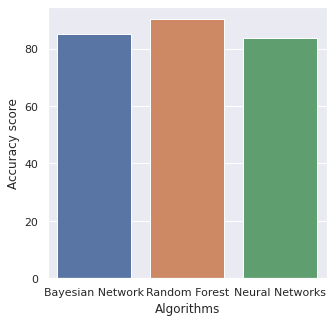

In [ ]:
# Comparison Between Different Classifiers
scores = [score_bn, score_rf, score_nn]
algorithms = ['Bayesian Network','Random Forest','Neural Networks']
sns.set(rc={'figure.figsize':(5,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [26]:
print(model.get_cpds('target'))

+-----------+--------------+-----+--------------------+
| thal      | thal(0)      | ... | thal(3)            |
+-----------+--------------+-----+--------------------+
| trestbpsC | trestbpsC(0) | ... | trestbpsC(1)       |
+-----------+--------------+-----+--------------------+
| target(0) | 0.5          | ... | 0.8108108108108109 |
+-----------+--------------+-----+--------------------+
| target(1) | 0.5          | ... | 0.1891891891891892 |
+-----------+--------------+-----+--------------------+


In [27]:
# Example (Finding marginal probabilities)
infer = VariableElimination(model)
print(infer.query(['target'], evidence= {'sex' : 0}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3090 |
+-----------+---------------+
| target(1) |        0.6910 |
+-----------+---------------+
